# Heart Disease Diagnostic Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')


In [8]:
hrt_d=pd.read_csv('C:\\Users\\hp\\Downloads\\UNIFIED PROJECTS\\Heart Disease data\\Heart_Disease_data.csv')

In [9]:
hrt_d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
hrt_d.shape

(1025, 14)

In [11]:
hrt_d.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [12]:
hrt_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [15]:
hrt_d['sex'].replace(0,'F',inplace=True)
hrt_d['sex'].replace(1,'M',inplace=True)

In [16]:
hrt_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


In [17]:
def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [19]:
hrt_d['Heart_Disease_occured']=hrt_d['target'].apply(heart_disease)
hrt_d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease_occured
0,52,M,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,M,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
2,70,M,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,M,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,F,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence


In [21]:
print(hrt_d.groupby('Heart_Disease_occured')['target'].count())

Heart_Disease_occured
Absence     499
Presence    526
Name: target, dtype: int64


In [26]:
print('Percentage of people having heart disease=',526*100/(499+526))

Percentage of people having heart disease= 51.31707317073171


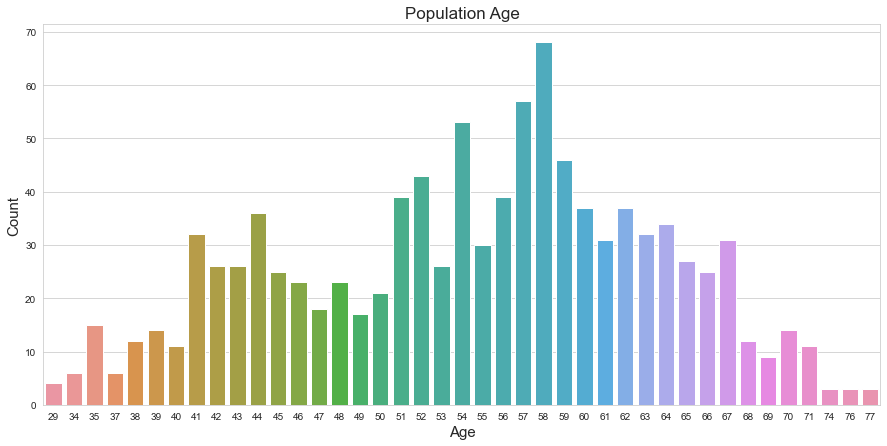

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(x='age', data=hrt_d)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

From the barplot we can tell that,

In [28]:
print('Minimum Age=',29);print('Maximum Age=',77)

Minimum Age= 29
Maximum Age= 77


In [30]:
Young_Ages=hrt_d[(hrt_d['age']>=29) & (hrt_d['age']<35)]
Middle_Ages=hrt_d[(hrt_d['age']>=35) & (hrt_d['age']<55)]
Elderly_Ages=hrt_d[(hrt_d['age']>55)]



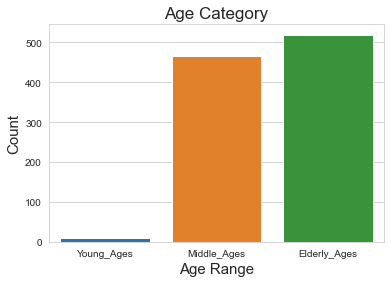

In [31]:
sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)])
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [32]:
def age_range(row):
    if row>=29 and row<35:
        return 'Young Age'
    elif row>=35 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [33]:
hrt_d['Age_Range']=hrt_d['age'].apply(age_range)
hrt_d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease_occured,Age_Range
0,52,M,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Middle Age
1,53,M,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Middle Age
2,70,M,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Elder Age
3,61,M,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Elder Age
4,62,F,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Elder Age


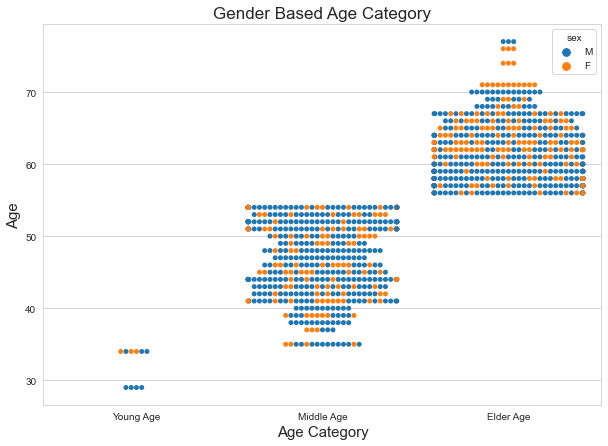

In [34]:
plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range', y='age', hue='sex', data=hrt_d, order=['Young Age','Middle Age','Elder Age'])
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

There are more males in middle age and females in edlerly age category.

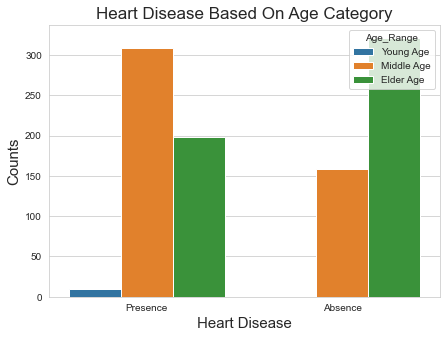

In [36]:
plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease_occured', hue='Age_Range', data=hrt_d, order=['Presence','Absence'], hue_order=hue_order)
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Middle ages are more prone to heart diseases.

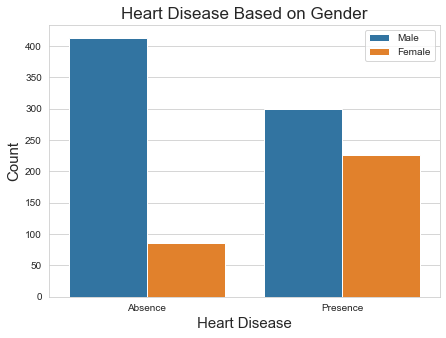

In [40]:
plt.figure(figsize=(7,5))
sns.countplot(x=hrt_d['Heart_Disease_occured'], hue='sex', data=hrt_d)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

There are more males in whom heart diseases occur.

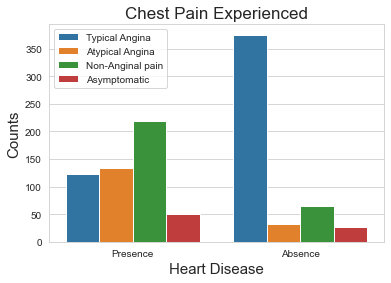

In [42]:
sns.countplot(x=hrt_d['Heart_Disease_occured'], hue='cp', data=hrt_d, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

Those with Typical Angina are seen to have no occurence of any heart disease.

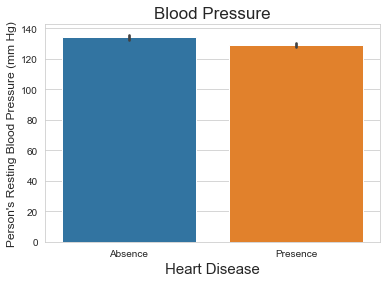

In [43]:
sns.barplot(x='Heart_Disease_occured', y='trestbps', data=hrt_d)
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

It seems a person's resting blood pressure has no relation to heart diseases in the given sample population.

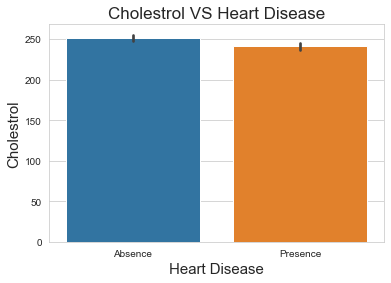

In [44]:
sns.barplot(x='Heart_Disease_occured', y='chol', data=hrt_d)
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

There seems to no relation to cholestrol and heart disease too in the sample population.

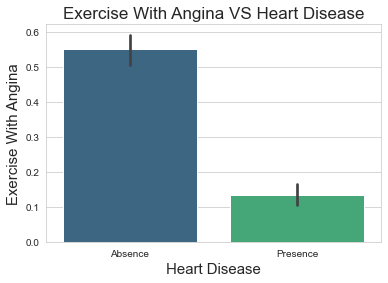

In [45]:
sns.barplot(x='Heart_Disease_occured', y='exang', data=hrt_d, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

Apparently people who suffering from Angina due to exercise are not likely to not get any heart diseases in the given dataset.